In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from sklearn.metrics import classification_report, confusion_matrix
#import tensorflow.keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline

In [4]:
import os
import sys
os.chdir(sys.path[0])

In [5]:
df=pd.read_csv("gt_training.csv")  
df.head()

,Image ID,Image class
0,1,Homogeneous
1,2,Homogeneous
2,3,Homogeneous
3,4,Homogeneous
4,5,Homogeneous


In [6]:
def process_files(x):
    if (len(str(x)) == 1):
        return "0000"+str(x)+".png"
    if (len(str(x)) == 2):
        return "000"+str(x)+".png"
    if (len(str(x)) == 3):
        return "00"+str(x)+".png"
    if (len(str(x)) == 4):
        return "0"+str(x)+".png"
    if (len(str(x)) == 5):
        return str(x)+".png"

In [7]:
df['Image ID'] = df['Image ID'].map(lambda x: process_files(x))
df.head()

,Image ID,Image class
0,00001.png,Homogeneous
1,00002.png,Homogeneous
2,00003.png,Homogeneous
3,00004.png,Homogeneous
4,00005.png,Homogeneous


In [8]:
from PIL import Image
im = Image.open("training/00001.png")
im.size

(78, 78)

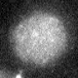

In [9]:
from IPython.display import Image 
Image(filename='training/00001.png')

In [10]:
datagen=ImageDataGenerator(rescale=1./255.,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="training", 
                                            x_col="Image ID", y_col="Image class", class_mode="categorical", 
                                            target_size=(78,78), batch_size=113, color_mode='grayscale')

Found 8701 images belonging to 6 classes.


In [11]:
train_generator.image_shape

(78, 78, 1)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(dataframe=df,directory="test",
                                                x_col="Image ID", y_col="Image class", class_mode="categorical",
                                                target_size=(78,78), batch_size=113, color_mode='grayscale',shuffle=False)

Found 2720 images belonging to 6 classes.


In [13]:
test_generator.image_shape

(78, 78, 1)

In [14]:
validation_datagen=ImageDataGenerator(rescale=1./255.)

validation_generator=validation_datagen.flow_from_dataframe(dataframe=df,directory="validation",
                                                x_col="Image ID", y_col="Image class", class_mode="categorical",
                                                target_size=(78,78), batch_size=113, color_mode='grayscale',shuffle=False)

Found 2175 images belonging to 6 classes.


In [15]:
validation_generator.image_shape

(78, 78, 1)

In [16]:
x_train = train_generator.filenames
y_train = train_generator.labels

In [17]:
x_val = validation_generator.filenames
y_val = validation_generator.labels

In [18]:
x_test = test_generator.filenames
y_test = test_generator.labels
label_index = test_generator.class_indices

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(6, 7, input_shape=(78, 78, 1)))#, activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, 4))#, activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(32, 3))#, activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(150))#, activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.Dense(6, activation='softmax'))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 72, 72, 6)         300       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 72, 72, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 16)        1552      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 33, 33, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          4

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01, decay=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cell_model = model.fit_generator(generator=train_generator, validation_data=validation_generator, epochs=1000)

Epoch 1/1000
77/77 [==============================] - 37s 485ms/step - loss: 1.2787 - accuracy: 0.4599 - val_loss: 0.9068 - val_accuracy: 0.6630
Epoch 2/1000
77/77 [==============================] - 10s 130ms/step - loss: 0.8621 - accuracy: 0.6516 - val_loss: 0.6906 - val_accuracy: 0.7237
Epoch 3/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.7144 - accuracy: 0.7183 - val_loss: 0.5617 - val_accuracy: 0.7628
Epoch 4/1000
77/77 [==============================] - 10s 125ms/step - loss: 0.6476 - accuracy: 0.7478 - val_loss: 0.4880 - val_accuracy: 0.8308
Epoch 5/1000
77/77 [==============================] - 10s 130ms/step - loss: 0.5998 - accuracy: 0.7705 - val_loss: 0.5334 - val_accuracy: 0.8143
Epoch 6/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.5673 - accuracy: 0.7813 - val_loss: 0.6355 - val_accuracy: 0.7430
Epoch 7/1000
77/77 [==============================] - 10s 132ms/step - loss: 0.5239 - accuracy: 0.7968 - val_loss: 0.3736 - val_ac

77/77 [==============================] - 9s 119ms/step - loss: 0.2657 - accuracy: 0.9046 - val_loss: 0.1897 - val_accuracy: 0.9324
Epoch 58/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.2637 - accuracy: 0.9036 - val_loss: 0.1842 - val_accuracy: 0.9283
Epoch 59/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.2531 - accuracy: 0.9096 - val_loss: 0.2271 - val_accuracy: 0.9246
Epoch 60/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.2466 - accuracy: 0.9091 - val_loss: 0.2283 - val_accuracy: 0.9172
Epoch 61/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.2602 - accuracy: 0.9044 - val_loss: 0.1960 - val_accuracy: 0.9251
Epoch 62/1000
77/77 [==============================] - 10s 135ms/step - loss: 0.2517 - accuracy: 0.9067 - val_loss: 0.2096 - val_accuracy: 0.9241
Epoch 63/1000
77/77 [==============================] - 10s 128ms/step - loss: 0.2612 - accuracy: 0.9036 - val_loss: 0.2792 - val_accuracy: 0.90

77/77 [==============================] - 10s 128ms/step - loss: 0.2053 - accuracy: 0.9258 - val_loss: 0.1562 - val_accuracy: 0.9476
Epoch 114/1000
77/77 [==============================] - 10s 129ms/step - loss: 0.1969 - accuracy: 0.9284 - val_loss: 0.1909 - val_accuracy: 0.9310
Epoch 115/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.2054 - accuracy: 0.9263 - val_loss: 0.1626 - val_accuracy: 0.9457
Epoch 116/1000
77/77 [==============================] - 9s 116ms/step - loss: 0.1945 - accuracy: 0.9307 - val_loss: 0.1771 - val_accuracy: 0.9352
Epoch 117/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.1962 - accuracy: 0.9263 - val_loss: 0.1706 - val_accuracy: 0.9425
Epoch 118/1000
77/77 [==============================] - 14s 176ms/step - loss: 0.2000 - accuracy: 0.9289 - val_loss: 0.1769 - val_accuracy: 0.9393
Epoch 119/1000
77/77 [==============================] - 14s 179ms/step - loss: 0.1938 - accuracy: 0.9292 - val_loss: 0.1962 - val_accura

Epoch 169/1000
77/77 [==============================] - 10s 133ms/step - loss: 0.1708 - accuracy: 0.9389 - val_loss: 0.1757 - val_accuracy: 0.9425
Epoch 170/1000
77/77 [==============================] - 10s 132ms/step - loss: 0.1687 - accuracy: 0.9377 - val_loss: 0.1761 - val_accuracy: 0.9389
Epoch 171/1000
77/77 [==============================] - 11s 137ms/step - loss: 0.1661 - accuracy: 0.9372 - val_loss: 0.1563 - val_accuracy: 0.9425
Epoch 172/1000
77/77 [==============================] - 10s 131ms/step - loss: 0.1622 - accuracy: 0.9435 - val_loss: 0.1719 - val_accuracy: 0.9411
Epoch 173/1000
77/77 [==============================] - 10s 135ms/step - loss: 0.1585 - accuracy: 0.9458 - val_loss: 0.1401 - val_accuracy: 0.9554
Epoch 174/1000
77/77 [==============================] - 11s 141ms/step - loss: 0.1665 - accuracy: 0.9386 - val_loss: 0.1562 - val_accuracy: 0.9490
Epoch 175/1000
77/77 [==============================] - 12s 152ms/step - loss: 0.1611 - accuracy: 0.9438 - val_loss: 0

Epoch 225/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1471 - accuracy: 0.9479 - val_loss: 0.1565 - val_accuracy: 0.9490
Epoch 226/1000
77/77 [==============================] - 9s 113ms/step - loss: 0.1445 - accuracy: 0.9461 - val_loss: 0.1494 - val_accuracy: 0.9508
Epoch 227/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1476 - accuracy: 0.9477 - val_loss: 0.1471 - val_accuracy: 0.9503
Epoch 228/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1487 - accuracy: 0.9451 - val_loss: 0.1383 - val_accuracy: 0.9540
Epoch 229/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1377 - accuracy: 0.9520 - val_loss: 0.1431 - val_accuracy: 0.9568
Epoch 230/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1460 - accuracy: 0.9483 - val_loss: 0.1525 - val_accuracy: 0.9531
Epoch 231/1000
77/77 [==============================] - 9s 116ms/step - loss: 0.1499 - accuracy: 0.9446 - val_loss: 0.1368 -

77/77 [==============================] - 9s 116ms/step - loss: 0.1322 - accuracy: 0.9529 - val_loss: 0.1276 - val_accuracy: 0.9540
Epoch 282/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1391 - accuracy: 0.9482 - val_loss: 0.1331 - val_accuracy: 0.9577
Epoch 283/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.1302 - accuracy: 0.9507 - val_loss: 0.1541 - val_accuracy: 0.9439
Epoch 284/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1385 - accuracy: 0.9487 - val_loss: 0.1525 - val_accuracy: 0.9536
Epoch 285/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.1263 - accuracy: 0.9559 - val_loss: 0.1306 - val_accuracy: 0.9582
Epoch 286/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1360 - accuracy: 0.9533 - val_loss: 0.1263 - val_accuracy: 0.9563
Epoch 287/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1258 - accuracy: 0.9548 - val_loss: 0.1362 - val_accuracy:

77/77 [==============================] - 11s 138ms/step - loss: 0.1182 - accuracy: 0.9586 - val_loss: 0.1417 - val_accuracy: 0.9563
Epoch 338/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.1190 - accuracy: 0.9551 - val_loss: 0.1607 - val_accuracy: 0.9476
Epoch 339/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.1229 - accuracy: 0.9559 - val_loss: 0.1409 - val_accuracy: 0.9531
Epoch 340/1000
77/77 [==============================] - 10s 130ms/step - loss: 0.1179 - accuracy: 0.9543 - val_loss: 0.1365 - val_accuracy: 0.9568
Epoch 341/1000
77/77 [==============================] - 10s 135ms/step - loss: 0.1130 - accuracy: 0.9606 - val_loss: 0.1558 - val_accuracy: 0.9517
Epoch 342/1000
77/77 [==============================] - 10s 129ms/step - loss: 0.1260 - accuracy: 0.9543 - val_loss: 0.1555 - val_accuracy: 0.9517
Epoch 343/1000
77/77 [==============================] - 10s 132ms/step - loss: 0.1223 - accuracy: 0.9549 - val_loss: 0.1412 - val_acc

Epoch 393/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.1128 - accuracy: 0.9603 - val_loss: 0.1485 - val_accuracy: 0.9513
Epoch 394/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.1116 - accuracy: 0.9598 - val_loss: 0.1415 - val_accuracy: 0.9572
Epoch 395/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1075 - accuracy: 0.9628 - val_loss: 0.1271 - val_accuracy: 0.9577
Epoch 396/1000
77/77 [==============================] - 9s 116ms/step - loss: 0.1127 - accuracy: 0.9576 - val_loss: 0.1363 - val_accuracy: 0.9563
Epoch 397/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.1075 - accuracy: 0.9614 - val_loss: 0.1294 - val_accuracy: 0.9572
Epoch 398/1000
77/77 [==============================] - 9s 114ms/step - loss: 0.1084 - accuracy: 0.9600 - val_loss: 0.1408 - val_accuracy: 0.9554
Epoch 399/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.1114 - accuracy: 0.9600 - val_loss: 0.1307 -

77/77 [==============================] - 9s 114ms/step - loss: 0.1060 - accuracy: 0.9620 - val_loss: 0.1246 - val_accuracy: 0.9623
Epoch 450/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.1011 - accuracy: 0.9632 - val_loss: 0.1423 - val_accuracy: 0.9559
Epoch 451/1000
77/77 [==============================] - 9s 112ms/step - loss: 0.1045 - accuracy: 0.9597 - val_loss: 0.1415 - val_accuracy: 0.9549
Epoch 452/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1029 - accuracy: 0.9651 - val_loss: 0.1342 - val_accuracy: 0.9545
Epoch 453/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1067 - accuracy: 0.9620 - val_loss: 0.1320 - val_accuracy: 0.9577
Epoch 454/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1057 - accuracy: 0.9616 - val_loss: 0.1464 - val_accuracy: 0.9540
Epoch 455/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1023 - accuracy: 0.9626 - val_loss: 0.1255 - val_accuracy: 

77/77 [==============================] - 11s 145ms/step - loss: 0.1055 - accuracy: 0.9628 - val_loss: 0.1383 - val_accuracy: 0.9572
Epoch 506/1000
77/77 [==============================] - 11s 140ms/step - loss: 0.0998 - accuracy: 0.9647 - val_loss: 0.1193 - val_accuracy: 0.9632
Epoch 507/1000
77/77 [==============================] - 10s 131ms/step - loss: 0.0994 - accuracy: 0.9659 - val_loss: 0.1341 - val_accuracy: 0.9545
Epoch 508/1000
77/77 [==============================] - 10s 131ms/step - loss: 0.0980 - accuracy: 0.9641 - val_loss: 0.1419 - val_accuracy: 0.9582
Epoch 509/1000
77/77 [==============================] - 10s 123ms/step - loss: 0.0993 - accuracy: 0.9640 - val_loss: 0.1278 - val_accuracy: 0.9591
Epoch 510/1000
77/77 [==============================] - 13s 164ms/step - loss: 0.0982 - accuracy: 0.9647 - val_loss: 0.1169 - val_accuracy: 0.9609
Epoch 511/1000
77/77 [==============================] - 11s 144ms/step - loss: 0.1074 - accuracy: 0.9610 - val_loss: 0.1343 - val_acc

Epoch 561/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.0983 - accuracy: 0.9658 - val_loss: 0.1411 - val_accuracy: 0.9517
Epoch 562/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0918 - accuracy: 0.9669 - val_loss: 0.1213 - val_accuracy: 0.9559
Epoch 563/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.0951 - accuracy: 0.9654 - val_loss: 0.1164 - val_accuracy: 0.9605
Epoch 564/1000
77/77 [==============================] - 10s 134ms/step - loss: 0.0990 - accuracy: 0.9626 - val_loss: 0.1189 - val_accuracy: 0.9586
Epoch 565/1000
77/77 [==============================] - 10s 128ms/step - loss: 0.0941 - accuracy: 0.9666 - val_loss: 0.1207 - val_accuracy: 0.9600
Epoch 566/1000
77/77 [==============================] - 11s 143ms/step - loss: 0.0976 - accuracy: 0.9648 - val_loss: 0.1245 - val_accuracy: 0.9572
Epoch 567/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.0971 - accuracy: 0.9669 - val_loss: 0.1

Epoch 617/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0892 - accuracy: 0.9660 - val_loss: 0.1264 - val_accuracy: 0.9586
Epoch 618/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0874 - accuracy: 0.9675 - val_loss: 0.1280 - val_accuracy: 0.9572
Epoch 619/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.0868 - accuracy: 0.9680 - val_loss: 0.1222 - val_accuracy: 0.9577
Epoch 620/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0982 - accuracy: 0.9644 - val_loss: 0.1237 - val_accuracy: 0.9605
Epoch 621/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0932 - accuracy: 0.9678 - val_loss: 0.1310 - val_accuracy: 0.9545
Epoch 622/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0926 - accuracy: 0.9658 - val_loss: 0.1265 - val_accuracy: 0.9577
Epoch 623/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0933 - accuracy: 0.9662 - val_loss: 0.1230 

77/77 [==============================] - 9s 117ms/step - loss: 0.0887 - accuracy: 0.9671 - val_loss: 0.1217 - val_accuracy: 0.9605
Epoch 674/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0864 - accuracy: 0.9669 - val_loss: 0.1318 - val_accuracy: 0.9586
Epoch 675/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.0926 - accuracy: 0.9664 - val_loss: 0.1309 - val_accuracy: 0.9577
Epoch 676/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0903 - accuracy: 0.9661 - val_loss: 0.1117 - val_accuracy: 0.9618
Epoch 677/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.0822 - accuracy: 0.9694 - val_loss: 0.1187 - val_accuracy: 0.9609
Epoch 678/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.0904 - accuracy: 0.9683 - val_loss: 0.1288 - val_accuracy: 0.9568
Epoch 679/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.0883 - accuracy: 0.9684 - val_loss: 0.1381 - val_accuracy: 

77/77 [==============================] - 10s 125ms/step - loss: 0.0865 - accuracy: 0.9677 - val_loss: 0.1240 - val_accuracy: 0.9591
Epoch 730/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0881 - accuracy: 0.9674 - val_loss: 0.1485 - val_accuracy: 0.9540
Epoch 731/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0848 - accuracy: 0.9669 - val_loss: 0.1277 - val_accuracy: 0.9614
Epoch 732/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.0851 - accuracy: 0.9674 - val_loss: 0.1215 - val_accuracy: 0.9605
Epoch 733/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0858 - accuracy: 0.9694 - val_loss: 0.1351 - val_accuracy: 0.9577
Epoch 734/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.0869 - accuracy: 0.9683 - val_loss: 0.1284 - val_accuracy: 0.9591
Epoch 735/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0882 - accuracy: 0.9690 - val_loss: 0.1223 - val_accuracy

77/77 [==============================] - 10s 124ms/step - loss: 0.0781 - accuracy: 0.9702 - val_loss: 0.1321 - val_accuracy: 0.9545
Epoch 786/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.0826 - accuracy: 0.9701 - val_loss: 0.1301 - val_accuracy: 0.9600
Epoch 787/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0791 - accuracy: 0.9715 - val_loss: 0.1287 - val_accuracy: 0.9609
Epoch 788/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0871 - accuracy: 0.9691 - val_loss: 0.1118 - val_accuracy: 0.9618
Epoch 789/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.0803 - accuracy: 0.9703 - val_loss: 0.1194 - val_accuracy: 0.9628
Epoch 790/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.0827 - accuracy: 0.9686 - val_loss: 0.1310 - val_accuracy: 0.9586
Epoch 791/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0820 - accuracy: 0.9712 - val_loss: 0.1179 - val_accurac

77/77 [==============================] - 10s 124ms/step - loss: 0.0815 - accuracy: 0.9705 - val_loss: 0.1277 - val_accuracy: 0.9595
Epoch 842/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.0797 - accuracy: 0.9729 - val_loss: 0.1103 - val_accuracy: 0.9655
Epoch 843/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0801 - accuracy: 0.9707 - val_loss: 0.1138 - val_accuracy: 0.9646
Epoch 844/1000
77/77 [==============================] - 10s 128ms/step - loss: 0.0869 - accuracy: 0.9686 - val_loss: 0.1289 - val_accuracy: 0.9595
Epoch 845/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0805 - accuracy: 0.9693 - val_loss: 0.1311 - val_accuracy: 0.9600
Epoch 846/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0784 - accuracy: 0.9720 - val_loss: 0.1175 - val_accuracy: 0.9637
Epoch 847/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0822 - accuracy: 0.9708 - val_loss: 0.1173 - val_accuracy

77/77 [==============================] - 10s 126ms/step - loss: 0.0840 - accuracy: 0.9697 - val_loss: 0.1312 - val_accuracy: 0.9531
Epoch 898/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.0823 - accuracy: 0.9701 - val_loss: 0.1327 - val_accuracy: 0.9577
Epoch 899/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0784 - accuracy: 0.9716 - val_loss: 0.1249 - val_accuracy: 0.9568
Epoch 900/1000
77/77 [==============================] - 9s 116ms/step - loss: 0.0779 - accuracy: 0.9710 - val_loss: 0.1347 - val_accuracy: 0.9595
Epoch 901/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.0744 - accuracy: 0.9729 - val_loss: 0.1263 - val_accuracy: 0.9623
Epoch 902/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.0746 - accuracy: 0.9732 - val_loss: 0.1323 - val_accuracy: 0.9563
Epoch 903/1000
77/77 [==============================] - 9s 115ms/step - loss: 0.0858 - accuracy: 0.9694 - val_loss: 0.1212 - val_accuracy:

77/77 [==============================] - 9s 119ms/step - loss: 0.0787 - accuracy: 0.9735 - val_loss: 0.1377 - val_accuracy: 0.9526
Epoch 954/1000
77/77 [==============================] - 9s 116ms/step - loss: 0.0753 - accuracy: 0.9726 - val_loss: 0.1259 - val_accuracy: 0.9586
Epoch 955/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.0733 - accuracy: 0.9716 - val_loss: 0.1285 - val_accuracy: 0.9591
Epoch 956/1000
77/77 [==============================] - 9s 116ms/step - loss: 0.0741 - accuracy: 0.9726 - val_loss: 0.1249 - val_accuracy: 0.9582
Epoch 957/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0755 - accuracy: 0.9728 - val_loss: 0.1371 - val_accuracy: 0.9563
Epoch 958/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.0760 - accuracy: 0.9736 - val_loss: 0.1365 - val_accuracy: 0.9586
Epoch 959/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.0726 - accuracy: 0.9723 - val_loss: 0.1205 - val_accuracy: 

In [23]:
pred=model.predict_generator(test_generator, verbose=1)  # for confusion matrix

25/25 [==============================] - 6s 230ms/step


In [24]:
test_model = model.evaluate_generator(generator=test_generator)
test_model

[0.21511738728731872, 0.9481618]

In [25]:
y_pred = np.argmax(pred, axis=1)
y_pred.shape

(2720,)

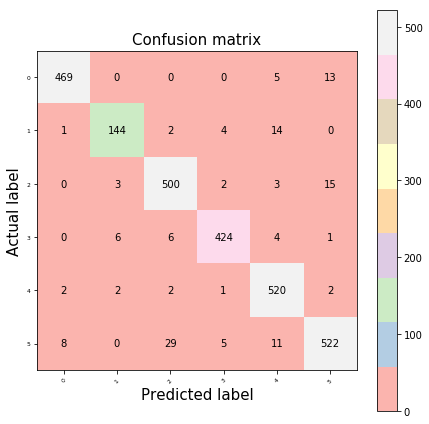

In [26]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(6)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5"], rotation=45, size = 6)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5"], size = 6)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       487
           1       0.93      0.87      0.90       165
           2       0.93      0.96      0.94       523
           3       0.97      0.96      0.97       441
           4       0.93      0.98      0.96       529
           5       0.94      0.91      0.93       575

   micro avg       0.95      0.95      0.95      2720
   macro avg       0.95      0.94      0.94      2720
weighted avg       0.95      0.95      0.95      2720



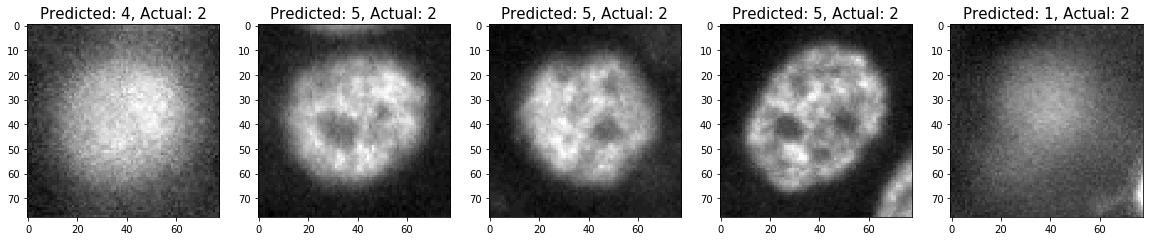

In [28]:

#Misclassified images
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    data = image.imread('./test/'+x_test[badIndex])
    plt.imshow(data, cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 15)

In [29]:
label_index

{'Centromere': 0,
 'Golgi': 1,
 'Homogeneous': 2,
 'NuMem': 3,
 'Nucleolar': 4,
 'Speckled': 5}

In [30]:
model1 = models.Sequential()
model1.add(layers.Conv2D(6, 7, input_shape=(78, 78, 1)))#, activation='relu'))
model1.add(layers.LeakyReLU())
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(16, 4))#, activation='relu'))
model1.add(layers.LeakyReLU())
model1.add(layers.MaxPooling2D((3, 3)))

model1.add(layers.Conv2D(32, 3))#, activation='relu'))
model1.add(layers.LeakyReLU())
model1.add(layers.MaxPooling2D((3, 3)))

model1.add(layers.Flatten())
model1.add(layers.Dense(150))#, activation='relu'))
model1.add(layers.LeakyReLU())
model1.add(layers.Dense(6, activation='softmax'))


In [31]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 72, 72, 6)         300       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 72, 72, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 16)        1552      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 33, 33, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)         

In [32]:
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01, decay=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
datagen=ImageDataGenerator(rescale=1./255.,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="./training", 
                                            x_col="Image ID", y_col="Image class", class_mode="categorical", 
                                            target_size=(78,78), batch_size=113, color_mode='grayscale')

Found 8701 images belonging to 6 classes.


In [34]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(dataframe=df,directory="./test",
                                                x_col="Image ID", y_col="Image class", class_mode="categorical",
                                                target_size=(78,78), batch_size=113, color_mode='grayscale',shuffle=False)

Found 2720 images belonging to 6 classes.


In [35]:
cell_model1 = model1.fit_generator(generator=train_generator,validation_data=test_generator, epochs=1000)

Epoch 1/1000
77/77 [==============================] - 11s 147ms/step - loss: 1.3107 - accuracy: 0.4601 - val_loss: 0.8347 - val_accuracy: 0.7040
Epoch 2/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.9291 - accuracy: 0.6380 - val_loss: 0.8640 - val_accuracy: 0.6706
Epoch 3/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.7615 - accuracy: 0.7023 - val_loss: 0.5975 - val_accuracy: 0.7654
Epoch 4/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.6499 - accuracy: 0.7450 - val_loss: 0.6069 - val_accuracy: 0.7673
Epoch 5/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.6586 - accuracy: 0.7431 - val_loss: 0.5019 - val_accuracy: 0.8136
Epoch 6/1000
77/77 [==============================] - 10s 123ms/step - loss: 0.5894 - accuracy: 0.7740 - val_loss: 0.4731 - val_accuracy: 0.8257
Epoch 7/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.5566 - accuracy: 0.7901 - val_loss: 0.4793 - val_ac

77/77 [==============================] - 9s 120ms/step - loss: 0.2765 - accuracy: 0.9009 - val_loss: 0.3086 - val_accuracy: 0.9118
Epoch 58/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.2685 - accuracy: 0.9017 - val_loss: 0.3239 - val_accuracy: 0.9099
Epoch 59/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.2757 - accuracy: 0.9010 - val_loss: 0.3020 - val_accuracy: 0.9037
Epoch 60/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.2739 - accuracy: 0.9005 - val_loss: 0.3198 - val_accuracy: 0.9077
Epoch 61/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.2785 - accuracy: 0.9002 - val_loss: 0.3128 - val_accuracy: 0.8971
Epoch 62/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.2682 - accuracy: 0.9028 - val_loss: 0.2820 - val_accuracy: 0.9107
Epoch 63/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.2696 - accuracy: 0.9030 - val_loss: 0.2843 - val_accuracy: 0.9121

77/77 [==============================] - 10s 124ms/step - loss: 0.2041 - accuracy: 0.9300 - val_loss: 0.2754 - val_accuracy: 0.9199
Epoch 114/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.1936 - accuracy: 0.9305 - val_loss: 0.3063 - val_accuracy: 0.9140
Epoch 115/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.2097 - accuracy: 0.9243 - val_loss: 0.2598 - val_accuracy: 0.9224
Epoch 116/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.2119 - accuracy: 0.9216 - val_loss: 0.2541 - val_accuracy: 0.9243
Epoch 117/1000
77/77 [==============================] - 10s 125ms/step - loss: 0.1956 - accuracy: 0.9282 - val_loss: 0.2531 - val_accuracy: 0.9254
Epoch 118/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.2059 - accuracy: 0.9250 - val_loss: 0.2404 - val_accuracy: 0.9349
Epoch 119/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.2017 - accuracy: 0.9283 - val_loss: 0.2473 - val_accura

77/77 [==============================] - 10s 124ms/step - loss: 0.1774 - accuracy: 0.9353 - val_loss: 0.2501 - val_accuracy: 0.9279
Epoch 170/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1781 - accuracy: 0.9368 - val_loss: 0.2249 - val_accuracy: 0.9320
Epoch 171/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.1760 - accuracy: 0.9353 - val_loss: 0.2184 - val_accuracy: 0.9360
Epoch 172/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.1705 - accuracy: 0.9397 - val_loss: 0.2407 - val_accuracy: 0.9312
Epoch 173/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1699 - accuracy: 0.9422 - val_loss: 0.2519 - val_accuracy: 0.9298
Epoch 174/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1655 - accuracy: 0.9402 - val_loss: 0.2106 - val_accuracy: 0.9393
Epoch 175/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1645 - accuracy: 0.9449 - val_loss: 0.2556 - val_accuracy:

77/77 [==============================] - 10s 124ms/step - loss: 0.1466 - accuracy: 0.9475 - val_loss: 0.2097 - val_accuracy: 0.9397
Epoch 226/1000
77/77 [==============================] - 10s 128ms/step - loss: 0.1446 - accuracy: 0.9478 - val_loss: 0.2097 - val_accuracy: 0.9331
Epoch 227/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.1565 - accuracy: 0.9448 - val_loss: 0.1883 - val_accuracy: 0.9419
Epoch 228/1000
77/77 [==============================] - 10s 129ms/step - loss: 0.1496 - accuracy: 0.9430 - val_loss: 0.1928 - val_accuracy: 0.9412
Epoch 229/1000
77/77 [==============================] - 10s 133ms/step - loss: 0.1485 - accuracy: 0.9471 - val_loss: 0.2266 - val_accuracy: 0.9301
Epoch 230/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.1490 - accuracy: 0.9486 - val_loss: 0.2223 - val_accuracy: 0.9338
Epoch 231/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.1555 - accuracy: 0.9418 - val_loss: 0.2259 - val_accu

77/77 [==============================] - 10s 124ms/step - loss: 0.1327 - accuracy: 0.9538 - val_loss: 0.2254 - val_accuracy: 0.9298
Epoch 282/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1266 - accuracy: 0.9543 - val_loss: 0.1984 - val_accuracy: 0.9375
Epoch 283/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1345 - accuracy: 0.9510 - val_loss: 0.1994 - val_accuracy: 0.9364
Epoch 284/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1390 - accuracy: 0.9490 - val_loss: 0.1958 - val_accuracy: 0.9390
Epoch 285/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1436 - accuracy: 0.9502 - val_loss: 0.2135 - val_accuracy: 0.9375
Epoch 286/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1412 - accuracy: 0.9514 - val_loss: 0.2022 - val_accuracy: 0.9382
Epoch 287/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.1357 - accuracy: 0.9532 - val_loss: 0.2151 - val_accuracy

77/77 [==============================] - 9s 122ms/step - loss: 0.1255 - accuracy: 0.9520 - val_loss: 0.2112 - val_accuracy: 0.9331
Epoch 338/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1292 - accuracy: 0.9528 - val_loss: 0.1789 - val_accuracy: 0.9430
Epoch 339/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1244 - accuracy: 0.9548 - val_loss: 0.1798 - val_accuracy: 0.9441
Epoch 340/1000
77/77 [==============================] - 10s 123ms/step - loss: 0.1344 - accuracy: 0.9536 - val_loss: 0.2049 - val_accuracy: 0.9371
Epoch 341/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1262 - accuracy: 0.9547 - val_loss: 0.1834 - val_accuracy: 0.9419
Epoch 342/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1203 - accuracy: 0.9571 - val_loss: 0.1990 - val_accuracy: 0.9386
Epoch 343/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1315 - accuracy: 0.9506 - val_loss: 0.2241 - val_accuracy:

77/77 [==============================] - 9s 120ms/step - loss: 0.1104 - accuracy: 0.9606 - val_loss: 0.1838 - val_accuracy: 0.9434
Epoch 394/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1176 - accuracy: 0.9566 - val_loss: 0.1886 - val_accuracy: 0.9415
Epoch 395/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1098 - accuracy: 0.9601 - val_loss: 0.2067 - val_accuracy: 0.9423
Epoch 396/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1235 - accuracy: 0.9570 - val_loss: 0.1784 - val_accuracy: 0.9438
Epoch 397/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1236 - accuracy: 0.9553 - val_loss: 0.1675 - val_accuracy: 0.9452
Epoch 398/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1151 - accuracy: 0.9582 - val_loss: 0.2021 - val_accuracy: 0.9408
Epoch 399/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1076 - accuracy: 0.9599 - val_loss: 0.1932 - val_accuracy: 

77/77 [==============================] - 9s 118ms/step - loss: 0.1200 - accuracy: 0.9592 - val_loss: 0.1846 - val_accuracy: 0.9415
Epoch 450/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1114 - accuracy: 0.9602 - val_loss: 0.2247 - val_accuracy: 0.9371
Epoch 451/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1196 - accuracy: 0.9560 - val_loss: 0.1898 - val_accuracy: 0.9438
Epoch 452/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1055 - accuracy: 0.9621 - val_loss: 0.1886 - val_accuracy: 0.9430
Epoch 453/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1045 - accuracy: 0.9636 - val_loss: 0.2011 - val_accuracy: 0.9430
Epoch 454/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1163 - accuracy: 0.9594 - val_loss: 0.2106 - val_accuracy: 0.9419
Epoch 455/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1105 - accuracy: 0.9590 - val_loss: 0.1998 - val_accuracy: 

77/77 [==============================] - 9s 122ms/step - loss: 0.1100 - accuracy: 0.9583 - val_loss: 0.2156 - val_accuracy: 0.9423
Epoch 506/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1076 - accuracy: 0.9591 - val_loss: 0.1934 - val_accuracy: 0.9415
Epoch 507/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.1064 - accuracy: 0.9613 - val_loss: 0.1787 - val_accuracy: 0.9489
Epoch 508/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1052 - accuracy: 0.9638 - val_loss: 0.2077 - val_accuracy: 0.9441
Epoch 509/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.1080 - accuracy: 0.9606 - val_loss: 0.2025 - val_accuracy: 0.9441
Epoch 510/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.1001 - accuracy: 0.9629 - val_loss: 0.1980 - val_accuracy: 0.9445
Epoch 511/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1136 - accuracy: 0.9594 - val_loss: 0.1783 - val_accuracy: 

77/77 [==============================] - 9s 122ms/step - loss: 0.1011 - accuracy: 0.9620 - val_loss: 0.1918 - val_accuracy: 0.9426
Epoch 562/1000
77/77 [==============================] - 10s 127ms/step - loss: 0.1012 - accuracy: 0.9620 - val_loss: 0.1892 - val_accuracy: 0.9419
Epoch 563/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.0985 - accuracy: 0.9629 - val_loss: 0.1925 - val_accuracy: 0.9419
Epoch 564/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.1006 - accuracy: 0.9639 - val_loss: 0.1689 - val_accuracy: 0.9500
Epoch 565/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.1013 - accuracy: 0.9632 - val_loss: 0.2280 - val_accuracy: 0.9375
Epoch 566/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.1119 - accuracy: 0.9598 - val_loss: 0.1765 - val_accuracy: 0.9456
Epoch 567/1000
77/77 [==============================] - 10s 124ms/step - loss: 0.0957 - accuracy: 0.9647 - val_loss: 0.1666 - val_accura

77/77 [==============================] - 9s 119ms/step - loss: 0.1019 - accuracy: 0.9629 - val_loss: 0.1846 - val_accuracy: 0.9445
Epoch 618/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0981 - accuracy: 0.9632 - val_loss: 0.1794 - val_accuracy: 0.9463
Epoch 619/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0954 - accuracy: 0.9641 - val_loss: 0.1770 - val_accuracy: 0.9434
Epoch 620/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.1010 - accuracy: 0.9647 - val_loss: 0.1661 - val_accuracy: 0.9471
Epoch 621/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0987 - accuracy: 0.9656 - val_loss: 0.1789 - val_accuracy: 0.9426
Epoch 622/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0993 - accuracy: 0.9633 - val_loss: 0.1805 - val_accuracy: 0.9449
Epoch 623/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.0896 - accuracy: 0.9656 - val_loss: 0.1701 - val_accuracy: 

77/77 [==============================] - 9s 123ms/step - loss: 0.0960 - accuracy: 0.9661 - val_loss: 0.1729 - val_accuracy: 0.9493
Epoch 674/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.0954 - accuracy: 0.9644 - val_loss: 0.1970 - val_accuracy: 0.9430
Epoch 675/1000
77/77 [==============================] - 10s 125ms/step - loss: 0.1060 - accuracy: 0.9595 - val_loss: 0.2236 - val_accuracy: 0.9364
Epoch 676/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0890 - accuracy: 0.9689 - val_loss: 0.1726 - val_accuracy: 0.9489
Epoch 677/1000
77/77 [==============================] - 10s 125ms/step - loss: 0.0963 - accuracy: 0.9670 - val_loss: 0.1841 - val_accuracy: 0.9456
Epoch 678/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0986 - accuracy: 0.9632 - val_loss: 0.1976 - val_accuracy: 0.9423
Epoch 679/1000
77/77 [==============================] - 10s 123ms/step - loss: 0.0898 - accuracy: 0.9684 - val_loss: 0.1853 - val_accurac

Epoch 729/1000
77/77 [==============================] - 10s 125ms/step - loss: 0.0903 - accuracy: 0.9679 - val_loss: 0.1685 - val_accuracy: 0.9500
Epoch 730/1000
77/77 [==============================] - 10s 125ms/step - loss: 0.0830 - accuracy: 0.9698 - val_loss: 0.1698 - val_accuracy: 0.9471
Epoch 731/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.0929 - accuracy: 0.9653 - val_loss: 0.2262 - val_accuracy: 0.9327
Epoch 732/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.0908 - accuracy: 0.9666 - val_loss: 0.1670 - val_accuracy: 0.9463
Epoch 733/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.0938 - accuracy: 0.9675 - val_loss: 0.1835 - val_accuracy: 0.9408
Epoch 734/1000
77/77 [==============================] - 10s 126ms/step - loss: 0.0959 - accuracy: 0.9658 - val_loss: 0.1756 - val_accuracy: 0.9471
Epoch 735/1000
77/77 [==============================] - 10s 132ms/step - loss: 0.0926 - accuracy: 0.9669 - val_loss: 0

Epoch 785/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0912 - accuracy: 0.9670 - val_loss: 0.1850 - val_accuracy: 0.9430
Epoch 786/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0891 - accuracy: 0.9687 - val_loss: 0.1805 - val_accuracy: 0.9496
Epoch 787/1000
77/77 [==============================] - 9s 122ms/step - loss: 0.0826 - accuracy: 0.9691 - val_loss: 0.1909 - val_accuracy: 0.9445
Epoch 788/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0892 - accuracy: 0.9666 - val_loss: 0.1850 - val_accuracy: 0.9445
Epoch 789/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0878 - accuracy: 0.9682 - val_loss: 0.1627 - val_accuracy: 0.9518
Epoch 790/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0904 - accuracy: 0.9697 - val_loss: 0.1719 - val_accuracy: 0.9485
Epoch 791/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0869 - accuracy: 0.9661 - val_loss: 0.1868 -

77/77 [==============================] - 9s 118ms/step - loss: 0.0928 - accuracy: 0.9652 - val_loss: 0.1817 - val_accuracy: 0.9478
Epoch 842/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0792 - accuracy: 0.9698 - val_loss: 0.1979 - val_accuracy: 0.9438
Epoch 843/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0827 - accuracy: 0.9684 - val_loss: 0.1874 - val_accuracy: 0.9482
Epoch 844/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0921 - accuracy: 0.9689 - val_loss: 0.1876 - val_accuracy: 0.9456
Epoch 845/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0830 - accuracy: 0.9699 - val_loss: 0.1776 - val_accuracy: 0.9515
Epoch 846/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0822 - accuracy: 0.9703 - val_loss: 0.2044 - val_accuracy: 0.9460
Epoch 847/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0799 - accuracy: 0.9700 - val_loss: 0.2206 - val_accuracy: 

77/77 [==============================] - 9s 119ms/step - loss: 0.0877 - accuracy: 0.9683 - val_loss: 0.1729 - val_accuracy: 0.9441
Epoch 898/1000
77/77 [==============================] - 9s 121ms/step - loss: 0.0812 - accuracy: 0.9697 - val_loss: 0.1708 - val_accuracy: 0.9496
Epoch 899/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0822 - accuracy: 0.9728 - val_loss: 0.1593 - val_accuracy: 0.9482
Epoch 900/1000
77/77 [==============================] - 9s 123ms/step - loss: 0.0841 - accuracy: 0.9682 - val_loss: 0.1826 - val_accuracy: 0.9467
Epoch 901/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0853 - accuracy: 0.9707 - val_loss: 0.1811 - val_accuracy: 0.9460
Epoch 902/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0883 - accuracy: 0.9666 - val_loss: 0.1572 - val_accuracy: 0.9533
Epoch 903/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0846 - accuracy: 0.9710 - val_loss: 0.1912 - val_accuracy: 

77/77 [==============================] - 9s 120ms/step - loss: 0.0834 - accuracy: 0.9715 - val_loss: 0.1736 - val_accuracy: 0.9482
Epoch 954/1000
77/77 [==============================] - 9s 117ms/step - loss: 0.0817 - accuracy: 0.9686 - val_loss: 0.1928 - val_accuracy: 0.9452
Epoch 955/1000
77/77 [==============================] - 9s 119ms/step - loss: 0.0834 - accuracy: 0.9698 - val_loss: 0.1889 - val_accuracy: 0.9449
Epoch 956/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0805 - accuracy: 0.9707 - val_loss: 0.1864 - val_accuracy: 0.9452
Epoch 957/1000
77/77 [==============================] - 9s 120ms/step - loss: 0.0784 - accuracy: 0.9707 - val_loss: 0.1972 - val_accuracy: 0.9426
Epoch 958/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0867 - accuracy: 0.9680 - val_loss: 0.1709 - val_accuracy: 0.9485
Epoch 959/1000
77/77 [==============================] - 9s 118ms/step - loss: 0.0779 - accuracy: 0.9710 - val_loss: 0.1830 - val_accuracy: 

Text(0.5, 0, 'Epochs')

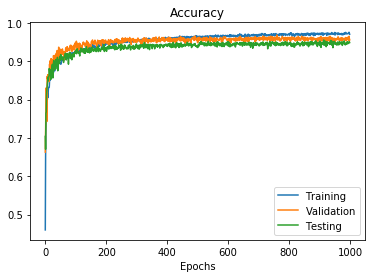

In [36]:
plt.plot(cell_model.history['accuracy'])
plt.plot(cell_model.history['val_accuracy'])
plt.plot(cell_model1.history['val_accuracy'])
plt.legend(['Training','Validation','Testing'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [37]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_generator)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1


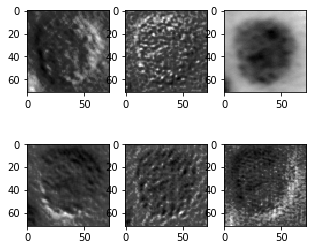

In [38]:
#output after input layer 1
display_activation(activations, 3, 2, 1)

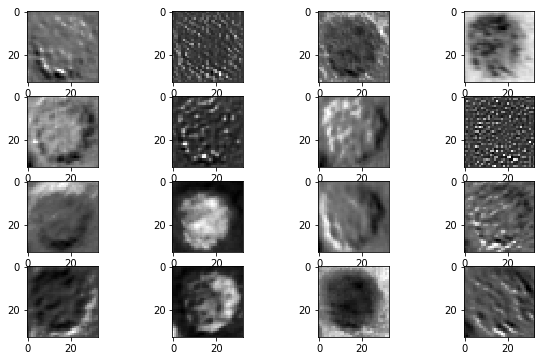

In [39]:
#output after input layer 4
display_activation(activations, 4, 4, 4)

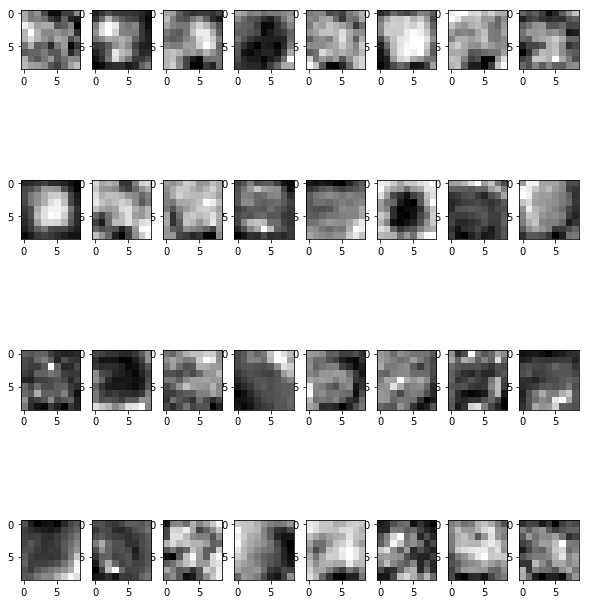

In [40]:
#output after input layer 7
display_activation(activations, 8, 4, 7)